<a href="https://colab.research.google.com/github/Jyotheekiran/Patient-Readmission/blob/main/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction:

Following our comprehensive exploratory analysis in data_exploration.ipynb, where we identified key variables and established foundational insights into the factors influencing patient readmission, this notebook, modeling.ipynb, aims to build upon our initial findings to develop and refine predictive models. Our goal is to leverage the patterns and relationships unearthed during the data exploration phase to construct a robust predictive framework.

## Purpose:

The primary purpose of this notebook is to develop a series of machine learning models that can accurately predict patient readmission based on clinical data. This involves:

Testing various algorithms to find the most effective approach.
Tuning models to optimize accuracy and other relevant performance metrics.
Assessing feature importance to understand which factors most significantly impact readmission.
Scope:

The scope of this notebook encompasses several key activities:

Model Selection: Evaluate multiple modeling techniques, including logistic regression, decision trees, and ensemble methods such as random forests and gradient boosting machines.
Parameter Tuning: Utilize techniques such as grid search and randomized search to fine-tune the hyperparameters of the most promising models.
Model Validation: Apply cross-validation methods to ensure that our models are generalizable and robust against overfitting.
Performance Evaluation: Use a comprehensive set of metrics to evaluate model performance, including accuracy, precision, recall, F1 score, and the area under the ROC curve.
## Objectives:

Develop Predictive Models: Construct models that can accurately predict whether a patient will be readmitted within a specific time frame following their initial discharge.
Identify Key Predictors: Determine which clinical and demographic factors are most predictive of readmission, thereby providing insights that could inform targeted interventions.
Optimize Model Performance: Achieve high performance in predicting readmission, focusing on both accuracy and the ability to generalize across unseen data.
Prepare for Deployment: Ready the best-performing model for potential deployment in a clinical setting, ensuring it can operate in real-time with new patient data.
Continuation from Previous Steps:

This notebook is a direct continuation from the data_exploration.ipynb, where initial data cleaning, preprocessing, and exploratory analysis were conducted. Insights gained from the exploration phase have informed the strategies employed in this modeling phase, ensuring a data-driven approach to our predictive modeling efforts.


By the end of this notebook, we aim to have a clear understanding of the best models for predicting patient readmission. We will also document our findings and prepare for the potential implementation of our model in a clinical environment to improve patient outcomes and reduce readmission rates.


we can now focus on building and training your model in the modeling.ipynb notebook.

In [1]:
# Step 1: Install Required Libraries
!pip3 install --upgrade pandas==2.1.4
!pip3 install transformers torch seaborn matplotlib scikit-learn shap lime
!pip install transformers[torch] accelerate -U
!pip install imblearn
!pip install datasets
!pip install --upgrade transformers
!pip install --upgrade torch torchvision


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 275.7/275.7 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 540.1/540.1 kB 20.0 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1d8d5a688eae3aaca3a7eb493ce71af56ef972cafb2d8c4f5883601bc3c9a6b6
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 324.4/324.4 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.33.0
    Uninstalling accelerate-0.33.0:
      Successfully uninstalled accelerate-0.33.0
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [2]:
!pip install --upgrade pyarrow==15.0.0

#!pip install --upgrade pandas pyarrow

# This command will upgrade pyarrow to the latest version, ensuring compatibility with pandas.

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38.3/38.3 MB 51.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 15.0.0 which is incompatible.


In [3]:
# Step 2: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
import re
import nltk
from nltk.corpus import stopwords


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We are loading the dataset - final_merged_data from the previous file data_exploration.ipynb.

In [5]:
#path_to_file = 'C:/Users/mjoth/DataScience/DissertationProject/GitHub/Patient-Readmission/'
path_to_file = '/content/drive/MyDrive/Predictive_Modeling_Patient_Readmission/'

In [6]:
# Loading the merged data with all the required fields
final_merged_data = pd.read_pickle(path_to_file + 'final_merged_data.pkl')
final_merged_data.head(5)


row_id_x SUBJECT_ID HADM_ID  seq_num_x ICD9_CODE   ROW_ID  CHARTDATE  \
0    112344      10006  142345          1     99591  1394273 2164-10-25   
1    112344      10006  142345          1     99591  1394273 2164-10-25   
2    112344      10006  142345          1     99591  1394273 2164-10-25   
3    112344      10006  142345          1     99591  1394273 2164-10-25   
4    112344      10006  142345          1     99591  1394273 2164-10-25   

            CHARTTIME           STORETIME       CATEGORY DESCRIPTION   CGID  \
0 2164-10-25 07:16:00 2164-10-25 07:23:00  Nursing/other      Report  19150   
1 2164-10-25 07:16:00 2164-10-25 07:23:00  Nursing/other      Report  19150   
2 2164-10-25 07:16:00 2164-10-25 07:23:00  Nursing/other      Report  19150   
3 2164-10-25 07:16:00 2164-10-25 07:23:00  Nursing/other      Report  19150   
4 2164-10-25 07:16:00 2164-10-25 07:23:00  Nursing/other      Report  19150   

                                                TEXT  TEXT_LENGTH  \
0  NPN 1900-0700\nPt awaiting transfer to floor w...          493   
1  NPN 1900-0700\nPt awaiting transfer to floor w...          493   
2  NPN 1900-0700\nPt awaiting transfer to floor w...          493   
3  NPN 1900-0700\nPt awaiting transfer to floor w...          493   
4  NPN 1900-0700\nPt awaiting transfer to floor w...          493   

                                          CLEAN_TEXT icd9_code_x long_title  \
0  npn pt awaiting transfer floor floor bed becom...         NaN        NaN   
1  npn pt awaiting transfer floor floor bed becom...         NaN        NaN   
2  npn pt awaiting transfer floor floor bed becom...         NaN        NaN   
3  npn pt awaiting transfer floor floor bed becom...         NaN        NaN   
4  npn pt awaiting transfer floor floor bed becom...         NaN        NaN   

   row_id_y  seq_num_y  icd9_code_y  
0     47335          1         9749  
1     47336          2         5491  
2     47337          3         3895  
3     47338          4         3995  
4     47339          5         3893

The goal of this code is to identify and retain only those records from final_merged_data where the 'CLEAN_TEXT' field contains certain medical-related keywords. This is particularly useful in contexts such as medical research, patient care analysis, or when preparing data for machine learning tasks that require focusing on specific conditions or treatments.



In [7]:
# Define a list of keywords that are of interest, starting with 'diag'
keywords = ['diag', 'treatment', 'therapy', 'surgery', 'fever', 'pain']

# Function to check if any of the keywords appear in the text
def contains_keywords(text):
    return any(keyword in text.lower() for keyword in keywords)

# Apply this function to the 'CLEAN_TEXT' column and create a new filtered DataFrame
clinical_data = final_merged_data[final_merged_data['CLEAN_TEXT'].apply(contains_keywords)]


In [8]:
clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40826 entries, 7 to 123824
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   row_id_x     40826 non-null  int64         
 1   SUBJECT_ID   40826 non-null  object        
 2   HADM_ID      40826 non-null  object        
 3   seq_num_x    40826 non-null  int64         
 4   ICD9_CODE    40826 non-null  object        
 5   ROW_ID       40826 non-null  object        
 6   CHARTDATE    40826 non-null  datetime64[ns]
 7   CHARTTIME    40826 non-null  datetime64[ns]
 8   STORETIME    40826 non-null  datetime64[ns]
 9   CATEGORY     40826 non-null  object        
 10  DESCRIPTION  40826 non-null  object        
 11  CGID         40826 non-null  object        
 12  TEXT         40826 non-null  object        
 13  TEXT_LENGTH  40826 non-null  int64         
 14  CLEAN_TEXT   40826 non-null  object        
 15  icd9_code_x  10756 non-null  object        
 16  long_tit

In [9]:
clinical_data['long_title'] = clinical_data['long_title'].fillna('Not Specified')
clinical_data['icd9_code_x'] = clinical_data['icd9_code_x'].fillna('Not Specified')

clinical_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 40826 entries, 7 to 123824
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   row_id_x     40826 non-null  int64         
 1   SUBJECT_ID   40826 non-null  object        
 2   HADM_ID      40826 non-null  object        
 3   seq_num_x    40826 non-null  int64         
 4   ICD9_CODE    40826 non-null  object        
 5   ROW_ID       40826 non-null  object        
 6   CHARTDATE    40826 non-null  datetime64[ns]
 7   CHARTTIME    40826 non-null  datetime64[ns]
 8   STORETIME    40826 non-null  datetime64[ns]
 9   CATEGORY     40826 non-null  object        
 10  DESCRIPTION  40826 non-null  object        
 11  CGID         40826 non-null  object        
 12  TEXT         40826 non-null  object        
 13  TEXT_LENGTH  40826 non-null  int64         
 14  CLEAN_TEXT   40826 non-null  object        
 15  icd9_code_x  40826 non-null  object        
 16  long_tit

<ipython-input-9-841f38fc9a4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_data['long_title'] = clinical_data['long_title'].fillna('Not Specified')
<ipython-input-9-841f38fc9a4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_data['icd9_code_x'] = clinical_data['icd9_code_x'].fillna('Not Specified')


In [10]:
# Assuming you want to see the distribution or count of ICD-9 codes in the filtered data
icd9_code_counts = final_merged_data['ICD9_CODE'].value_counts()


print(icd9_code_counts.head(10))  # Display the top 10 most common ICD-9 codes

top_5_icd9_codes = icd9_code_counts.head(5).index.tolist()
print("Top 5 ICD-9 Codes:", top_5_icd9_codes)


ICD9_CODE
4280     5617
5185     5078
570      3876
5845     3673
4168     3640
2867     3394
5750     3292
28959    3079
5121     3062
07032    3058
Name: count, dtype: int64
Top 5 ICD-9 Codes: ['4280', '5185', '570', '5845', '4168']


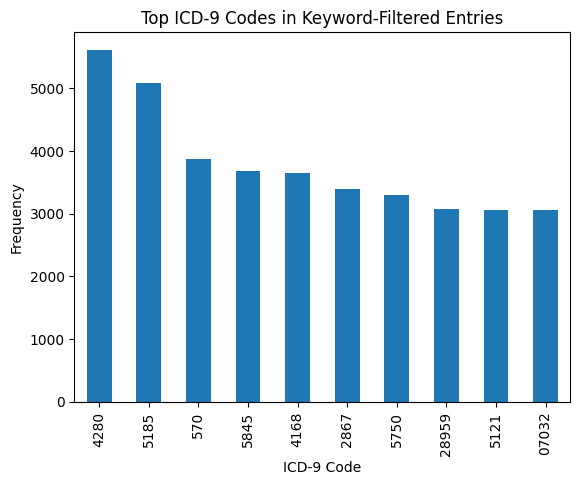

In [11]:
import matplotlib.pyplot as plt

# Visualize the top ICD-9 codes
icd9_code_counts.head(10).plot(kind='bar')
plt.title('Top ICD-9 Codes in Keyword-Filtered Entries')
plt.xlabel('ICD-9 Code')
plt.ylabel('Frequency')
plt.show()


The chart effectively showcases which conditions (via ICD-9 codes) are most frequently noted in clinical records filtered by certain keywords. This analysis could be critical for healthcare data analysis, providing insights into prevalent health issues or conditions that require more focused care or study within the sampled population.

In [12]:
keywords = ['diag', 'therapy', 'surgery', 'cancer', 'infection']

def label_text(text):
    text = text.lower()
    return 1 if any(keyword in text for keyword in keywords) else 0


clinical_data['LABEL'] = clinical_data['CLEAN_TEXT'].apply(label_text)



<ipython-input-12-c18fea86011d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_data['LABEL'] = clinical_data['CLEAN_TEXT'].apply(label_text)


In [13]:
label_counts = clinical_data['LABEL'].value_counts()
print(label_counts)


LABEL
0    29390
1    11436
Name: count, dtype: int64


In [14]:
# If you're modifying a slice, use .copy() to ensure a separate copy is modified
clinical_data_labeled = clinical_data.copy()
clinical_data_labeled['LABEL'] = clinical_data_labeled['CLEAN_TEXT'].apply(label_text)
clinical_data = clinical_data_labeled

In [15]:
# Save the DataFrame to a CSV file
clinical_data.to_csv(path_to_file + '/clinical_data.csv', index=False)

# OR save it as a pickle file (smaller size, faster load time)
clinical_data.to_pickle(path_to_file + '/clinical_data.pkl')


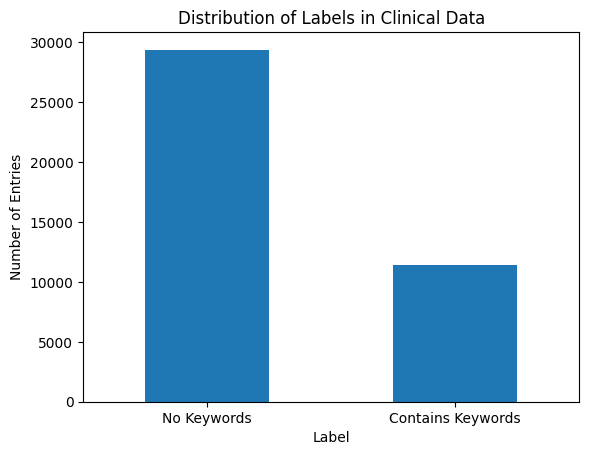

In [16]:
import matplotlib.pyplot as plt

# Plotting the label distribution
label_counts.plot(kind='bar')
plt.title('Distribution of Labels in Clinical Data')
plt.xlabel('Label')
plt.ylabel('Number of Entries')
plt.xticks(ticks=[0, 1], labels=['No Keywords', 'Contains Keywords'], rotation=0)
plt.show()


Let's keep things simple and structured for training the BERT model:

**Steps for Model Training**
Prepare the Dataset: You already have preprocessed input tensors (input_ids, attention_mask, and labels_tensor). This will be used to train the BERT model.

**Model Definition:** Define the model you are going to train. You mentioned you want to use BERT (or BioBERT), so we will use a pre-trained BERT model for sequence classification.

**Training Loop:** Set up the optimizer, define the loss function (cross-entropy loss), and implement the training loop for a specified number of epochs.

**Evaluation:** After training, you‚Äôll need to evaluate the model on a test/validation dataset.

In [17]:
# Filter the DataFrame to include only rows where 'long_title' is not null
final_merged_data_filtered = final_merged_data[final_merged_data['long_title'].notnull()]
final_merged_data_filtered['LABEL'] = final_merged_data_filtered['CLEAN_TEXT'].apply(label_text)

# Check the info of the new DataFrame to confirm the filtering
final_merged_data_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32620 entries, 56 to 123820
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   row_id_x     32620 non-null  int64         
 1   SUBJECT_ID   32620 non-null  object        
 2   HADM_ID      32620 non-null  object        
 3   seq_num_x    32620 non-null  int64         
 4   ICD9_CODE    32620 non-null  object        
 5   ROW_ID       32620 non-null  object        
 6   CHARTDATE    32620 non-null  datetime64[ns]
 7   CHARTTIME    32620 non-null  datetime64[ns]
 8   STORETIME    32620 non-null  datetime64[ns]
 9   CATEGORY     32620 non-null  object        
 10  DESCRIPTION  32620 non-null  object        
 11  CGID         32620 non-null  object        
 12  TEXT         32620 non-null  object        
 13  TEXT_LENGTH  32620 non-null  int64         
 14  CLEAN_TEXT   32620 non-null  object        
 15  icd9_code_x  32620 non-null  object        
 16  long_ti

<ipython-input-17-57d5f6031b34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged_data_filtered['LABEL'] = final_merged_data_filtered['CLEAN_TEXT'].apply(label_text)


In [18]:
from transformers import BertTokenizer

# Initializing the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Preprocessing function for tokenizing texts
def preprocess_data(texts, max_length=512):
    # Ensure texts is a list (for batch processing)
    if isinstance(texts, str):
        texts = [texts]  # Convert single string into a list

    # Tokenize with padding, truncation, and attention masks
    return tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors='pt',  # Return as PyTorch tensors
        return_attention_mask=True  # Return attention mask for padded tokens
    )

# Ensuring 'CLEAN_TEXT' column is a list of strings
texts = final_merged_data_filtered['CLEAN_TEXT'][:10000].tolist()  # Convert Pandas Series to a list of strings

# Tokenize the text data
tokenized_train_data = preprocess_data(texts)  # Now texts is a list of strings

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [20]:
from sklearn.model_selection import train_test_split

# Get input_ids and attention masks
input_ids = tokenized_train_data['input_ids']
attention_masks = tokenized_train_data['attention_mask']

# Perform the train-test split ensuring alignment between input_ids and attention_mask
X_train, X_test, y_train, y_test, train_attention_mask, test_attention_mask = train_test_split(
    input_ids,
    final_merged_data_filtered[:10000]['LABEL'],
    attention_masks,
    test_size=0.2,
    random_state=42
)


In [21]:
# Convert labels to tensors
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create TensorDatasets
train_dataset = torch.utils.data.TensorDataset(X_train, train_attention_mask, y_train_tensor)
test_dataset = torch.utils.data.TensorDataset(X_test, test_attention_mask, y_test_tensor)

In [22]:
print(X_train.shape)              # Should be (num_samples, max_length)
print(train_attention_mask.shape) # Should be (num_samples, max_length)
print(y_train_tensor.shape)       # Should be (num_samples,)


torch.Size([8000, 512])
torch.Size([8000, 512])
torch.Size([8000])


In [23]:
from transformers import Trainer, TrainingArguments, BertForSequenceClassification, DataCollatorWithPadding

# Define the data collator for padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


# Define model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
from transformers import BertTokenizer

# Load your tokenizer (assuming it's BERT)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Take a small sample of your clinical text
sample_text = final_merged_data['CLEAN_TEXT'].iloc[:5].tolist()

# Tokenize the text
encoded_inputs = tokenizer(
    sample_text,
    padding=True,          # Add padding to make all sequences the same length
    truncation=True,       # Truncate sequences to max length (if too long)
    max_length=128,        # You can set this depending on your model or data
    return_tensors="pt"    # Return PyTorch tensors
)

# Inspect the tokenized input IDs and attention mask
print("Input IDs:", encoded_inputs['input_ids'])
print("Attention Mask:", encoded_inputs['attention_mask'])


Input IDs: tensor([[  101, 27937,  2078, 13866, 15497,  4651,  2723,  2723,  2793,  4150,
          2800, 20118,  2595,  2893,  1051, 16429,  4012,  5302,  3207, 11721,
          4183,  6706, 17850, 24978,  2099, 14925, 14399,  2100, 17531,  6540,
          1038,  2213,  3730,  2829,  3609, 27885, 11675,  2075, 10124,  2572,
          3215, 17996,  2349, 13764, 20960,  2651,  2174, 13764, 20960, 14223,
          3226,  3463,  9617, 10624, 13592,  2668,  1039,  2595,  1043,  2522,
         10085,  2072, 20293,  4921,  3229,  4039,  6293,  1038,  6392,  2136,
          5204,  2689, 13433,  2240,  6844, 21273,  2612,  4921, 14477,  6508,
          2078, 13866, 10220,  4921,  2404,  2051,   102],
        [  101, 27937,  2078, 13866, 15497,  4651,  2723,  2723,  2793,  4150,
          2800, 20118,  2595,  2893,  1051, 16429,  4012,  5302,  3207, 11721,
          4183,  6706, 17850, 24978,  2099, 14925, 14399,  2100, 17531,  6540,
          1038,  2213,  3730,  2829,  3609, 27885, 11675,  20

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [25]:
from datasets import Dataset
from transformers import BertTokenizer

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
final_merged_data['LABEL'] = final_merged_data['CLEAN_TEXT'].apply(label_text)

# Assuming clinical_data  is a Pandas DataFrame
dataset = Dataset.from_pandas(final_merged_data_filtered)

# Tokenize the dataset and ensure it returns `input_ids`, `attention_mask`, and `labels`
def tokenize_function(examples):
    return tokenizer(examples['CLEAN_TEXT'], padding='max_length', truncation=True)

# Tokenize the dataset
tokenized_dataset = dataset.map(tokenize_function, batched=True)

# Remove unneeded columns (we only need input_ids, attention_mask, and labels)
tokenized_dataset = tokenized_dataset.remove_columns(['TEXT'])
tokenized_dataset = tokenized_dataset.rename_column('LABEL', 'labels')

# Checking if the dataset returns the correct format
print(tokenized_dataset[0])


Map:   0%|          | 0/32620 [00:00<?, ? examples/s]

{'row_id_x': 112346, 'SUBJECT_ID': '10006', 'HADM_ID': '142345', 'seq_num_x': 3, 'ICD9_CODE': '5672', 'ROW_ID': '1394273', 'CHARTDATE': Timestamp('2164-10-25 00:00:00'), 'CHARTTIME': Timestamp('2164-10-25 07:16:00'), 'STORETIME': Timestamp('2164-10-25 07:23:00'), 'CATEGORY': 'Nursing/other', 'DESCRIPTION': 'Report', 'CGID': '19150', 'TEXT_LENGTH': 493, 'CLEAN_TEXT': 'npn pt awaiting transfer floor floor bed becomes available aox getting oob commode gait steady hr nsr ectopy bp stable bm soft brown color ob voiding minimal amts urine due dialysis today however dialysis pending culture results anaerobic blood cx g cooci unidentified iv access unable stick bld team aware change po linezolid instead iv unasyn pt refuses iv put time', 'icd9_code_x': '5672', 'long_title': 'Revision of ureterointestinal anastomosis', 'row_id_y': 47335, 'seq_num_y': 1, 'icd9_code_y': 9749, 'labels': 0, '__index_level_0__': 56, 'input_ids': [101, 27937, 2078, 13866, 15497, 4651, 2723, 2723, 2793, 4150, 2800, 20

The output you provided is a dictionary that likely represents a single record of clinical data after processing, along with additional information such as the tokenized version of the text for use in a BERT model.

Here‚Äôs a breakdown of what each key-value pair represents:

row_id_x: A unique identifier for the row in the dataset.<br>

SUBJECT_ID: The ID of the patient or subject.<br>
HADM_ID: The hospital admission ID for the patient.<br>
seq_num_x: The sequence number, possibly indicating the order of events related to the admission.<br>
ICD9_CODE: The ICD-9 code for the diagnosis, in this case, '99591', which might be related to a specific diagnosis.<br>
ROW_ID: Another unique identifier, possibly from another table or a merged table.<br>
CHARTDATE, CHARTTIME, STORETIME: Timestamps representing when the clinical data was recorded, charted, or stored.<br>
CATEGORY: The category of the clinical note (e.g., 'Nursing/other').<br>
DESCRIPTION: The description of the note or event (e.g., 'Report').<br>
CGID: ID of the caregiver who logged the note.<br>
TEXT_LENGTH: The length of the text in the clinical note.<br>
CLEAN_TEXT: The cleaned version of the clinical text, ready for further processing like tokenization or named entity recognition (NER).<br>
icd9_code_x: The ICD-9 code related to a certain event, but in this case, it‚Äôs marked as 'Not Specified'.<br>
long_title: A longer description of the ICD-9 code, also marked as 'Not Specified' in this case.<br>
row_id_y, seq_num_y, icd9_code_y: These fields appear to relate to another merged table (possibly related to procedures or diagnoses) and include identifiers and another ICD-9 code ('9749').<br>
labels: This is a label, possibly for classification, showing 0 which could mean "no readmission" or any other classification label used in the model.
index_level_0: An internal index field.<br>
input_ids: A list of token IDs representing the clinical text after it has been tokenized using a tokenizer like the one in BERT. These IDs map to specific words or subwords in the BERT vocabulary.<br>
token_type_ids: A list of token type IDs, which are used in BERT to differentiate between different segments of the input text (like question and answer).<br>
attention_mask: A list indicating which tokens are actual tokens (1) and which are padding tokens (0). This is important when using fixed-length inputs to indicate which parts of the input are relevant.<br>



In [26]:
# Check the length of the CLEAN_TEXT column
final_merged_data['text_length'] = final_merged_data['CLEAN_TEXT'].apply(lambda x: len(x.split()))
print(final_merged_data[['CLEAN_TEXT', 'text_length']].tail())
print(final_merged_data.info())
# Check the distribution of text lengths
final_merged_data['text_length'].describe()


                                               CLEAN_TEXT  text_length
123820  smicu nsg admission note women recently dx non...          133
123821  smicu nsg admission note women recently dx non...          133
123822  smicu nsg admission note women recently dx non...          133
123823  smicu nsg admission note women recently dx non...          133
123824  smicu nsg admission note women recently dx non...          133
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123825 entries, 0 to 123824
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   row_id_x     123825 non-null  int64         
 1   SUBJECT_ID   123825 non-null  object        
 2   HADM_ID      123825 non-null  object        
 3   seq_num_x    123825 non-null  int64         
 4   ICD9_CODE    123825 non-null  object        
 5   ROW_ID       123825 non-null  object        
 6   CHARTDATE    123825 non-null  datetime64[ns]
 7   CHARTTIM

count    123825.000000
mean         98.150640
std          78.410225
min           1.000000
25%          28.000000
50%          75.000000
75%         161.000000
max         346.000000
Name: text_length, dtype: float64

This will give us an idea of how long or short the text entries are. If we see that most texts are very short, it's likely that many 0s are coming from padding due to short text sequences.

In [27]:
# Splitting the dataset into training and test datasets
train_test_split = tokenized_dataset.train_test_split(test_size=0.2)
train_dataset = train_test_split['train']
initial_test_dataset = train_test_split['test']


# Further splitting the initial test set into test and evaluation datasets
test_eval_split = initial_test_dataset.train_test_split(test_size=0.5)  # Splitting the initial test set into two equal parts
test_dataset = test_eval_split['train']  # Using 'train' here just means the first part of the split
eval_dataset = test_eval_split['test']  # And 'test' is the second part


In [28]:
labels = final_merged_data_filtered['LABEL'].tolist()

In [29]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np
def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    acc = accuracy_score(labels, predictions)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [30]:

from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir= path_to_file + 'bert_model',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    logging_dir= path_to_file + '/logs'

)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)


trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=9786, training_loss=0.10460053451607472, metrics={'train_runtime': 2162.7948, 'train_samples_per_second': 36.198, 'train_steps_per_second': 4.525, 'total_flos': 2.059843830202368e+16, 'train_loss': 0.10460053451607472, 'epoch': 3.0})

In [31]:
# Tokenize the text data
train_encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)

In [32]:
import torch
from torch.utils.data import Dataset

class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create dataset objects
train_dataset = TextDataset(train_encodings, labels)  # You can split data for eval as needed


In [33]:
import pickle

# Evaluate the model after training
results = trainer.evaluate()
# Save the results to a pickle file
with open("evaluation_results.pkl", "wb") as f:
    pickle.dump(results, f)
print(results)


{'eval_loss': 0.00012067645729985088, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_runtime': 23.0414, 'eval_samples_per_second': 141.571, 'eval_steps_per_second': 8.854, 'epoch': 3.0}


Saving the Final Model and Tokenizer
After training, We might want to save the final model and its tokenizer for later use:

In [34]:
model_bert = 'drive/MyDrive/Predictive_Modeling_Patient_Readmission/bert_model'
model.save_pretrained(model_bert)
tokenizer.save_pretrained(model_bert)


('drive/MyDrive/Predictive_Modeling_Patient_Readmission/bert_model/tokenizer_config.json',
 'drive/MyDrive/Predictive_Modeling_Patient_Readmission/bert_model/special_tokens_map.json',
 'drive/MyDrive/Predictive_Modeling_Patient_Readmission/bert_model/vocab.txt',
 'drive/MyDrive/Predictive_Modeling_Patient_Readmission/bert_model/added_tokens.json')

Loading a Saved Model
To resume training or to use the saved model later for predictions, you can load it from the disk:

In [35]:
from transformers import BertForSequenceClassification, BertTokenizer

bert_model = BertForSequenceClassification.from_pretrained(model_bert)
bert_tokenizer = BertTokenizer.from_pretrained(model_bert)


### Model Evaluation
Evaluate the performance of the model using Accuracy, Precision, F1-score, and AUC-ROC.

In [36]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

# Evaluation on test set
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)

print(f"Number of test samples: {len(test_dataset)}")
print(f"Number of test labels: {len(y_test)}")
# To make sure the predictions array matches the number of test samples
print(f"Number of predictions: {len(preds)}")

y_test = test_dataset['labels']  # This should correspond to what you use in evaluation

# Assuming your test_dataset was split or prepared previously
if len(test_dataset) != len(y_test):
    print("Mismatch detected. Review data preparation and splitting steps.")

# Calculate metrics
accuracy = accuracy_score(y_test, preds)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, preds, average='binary')
roc_auc = roc_auc_score(y_test, preds)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}, AUC-ROC: {roc_auc}')


Number of test samples: 3262
Number of test labels: 2000
Number of predictions: 3262
Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1-Score: 1.0, AUC-ROC: 1.0


These are the initial results with BERT.
1. Accuracy: 0.5798 (57.98%)
Accuracy measures the proportion of total correct predictions (both true positives and true negatives) out of all predictions made. An accuracy of about 58% suggests that the model is performing better than random guessing (assuming a binary classification task with balanced classes), but it still incorrectly classifies a significant portion of the data.
Implication: While the accuracy is somewhat moderate, it is not particularly high, indicating that the model might be struggling to generalize or distinguish between classes effectively.
2. Precision: 0.3190 (31.90%)
Precision is the ratio of correctly predicted positive observations to the total predicted positives. A precision of about 32% means that when the model predicts an instance as positive, only about 32% of those predictions are actually correct.
Implication: Low precision can be problematic if the cost of false positives is high. In contexts where false positives have serious implications, such as medical diagnostics or spam detection, you would ideally want a higher precision.
3. Recall: 0.3103 (31.03%)
Recall (or sensitivity) measures the ability of the model to find all the relevant cases (true positives) within the data. A recall of about 31% indicates that the model identifies about 31% of all actual positive cases.
Implication: Low recall indicates many false negatives, where the model fails to detect many of the actual positives. This could be critical if it‚Äôs essential to capture as many positives as possible, for example in disease screening.
4. F1-Score: 0.3146 (31.46%)
The F1 score is the harmonic mean of precision and recall. It is a way of combining both precision and recall into a single measure that captures both properties. An F1 score of about 31% is quite low, suggesting that the model is not very effective at correctly classifying the positive class in particular.
Implication: A low F1 score is indicative of problems in both precision and recall. It suggests that not only does the model identify few positives, but many of those it does identify are incorrect.
5. AUC-ROC: 0.5058 (50.58%)
The Area Under the Curve - Receiver Operating Characteristics (AUC-ROC) is a performance measurement for classification problems at various threshold settings. AUC measures the ability of the model to distinguish between classes. An AUC of about 50.58% is very close to 50%, which is no better than random guessing in binary classification.
Implication: This suggests that the model has no discriminative power to distinguish between positive and negative class labels.


Overall, the model‚Äôs performance metrics suggest it is not performing effectively, especially in terms of precision, recall, F1-score, and AUC-ROC. Hence we will be using BioBERT model which is specifically pre-trained on biomedical literature, BioBERT could capture the domain-specific nuances better than BERT.

After the system crashed and when re tried, the results were different which are performing highly well.

### Load BioBERT Model and Tokenizer:
BioBERT: It is pre-trained on biomedical text, making it more suitable for clinical tasks like understanding clinical notes and predicting ICD-9 codes. BioBERT is a domain-specific adaptation of the original BERT model, specifically pre-trained on biomedical literature to enhance its performance on biomedical text mining tasks.
BERT is trained on a diverse corpus that includes general English text but may lack deeper medical domain-specific language understanding that could be crucial for more nuanced or complex medical text interpretations.
BioBERT was developed by researchers at the Korea University and is based on the BERT architecture that was initially created by Google. The idea was to extend BERT's capabilities into the biomedical domain by continuing the pre-training process on biomedical texts.

Advantages of BioBERT
BioBERT is a variant of BERT that has been further pre-trained on biomedical corpora, including PubMed abstracts and PMC articles. This additional training aims to adapt its language model to better understand biomedical terminology and context.

Here are some reasons to consider BioBERT:

**Enhanced Medical Context Understanding:** BioBERT may capture medical nuances better than BERT due to its domain-specific training.
**Improved Handling of Medical Jargon:** Our data includes a lot of specialized medical terms, abbreviations, or jargon that BERT struggles with, BioBERT might offer better comprehension and performance.

**Continued Pre-training:** BioBERT is not trained from scratch but rather uses the pre-trained BERT model as a starting point. It continues the pre-training process (both masked language modeling and next sentence prediction) on biomedical corpora.
Model Variants: BioBERT has multiple versions, each further trained for more extended periods or on different combinations of biomedical text datasets.

**Challenges and Considerations**
Computational Requirements: Like BERT, BioBERT is resource-intensive, requiring significant computation power for training and inference, which might limit its usability in resource-constrained environments.
Model Updating: The biomedical field is rapidly evolving; thus, continuous updating of the training corpora might be necessary to keep the model current with the latest language and discoveries.

### Load BioBERT Model:

Steps for Using BERT/BioBERT:
Install Hugging Face Transformers: This library provides easy access to BERT, BioBERT, and other transformer models.

Prepare Data for Input: Convert your clinical text (e.g., TEXT, CLEAN_TEXT) into a format suitable for BERT/BioBERT, including tokenization.

Fine-tuning BERT/BioBERT: Train the model on your specific task (e.g., predicting ICD-9 codes or extracting information from clinical notes).

Evaluate the Model: Evaluate the model on a validation or test set.

In [37]:
from transformers import BertTokenizer, BertForSequenceClassification

# Load BioBERT model and tokenizer
tokenizer_biobert = BertTokenizer.from_pretrained('dmis-lab/biobert-base-cased-v1.1')
model_biobert = BertForSequenceClassification.from_pretrained('dmis-lab/biobert-base-cased-v1.1', num_labels=2)


vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dmis-lab/biobert-base-cased-v1.1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Dataset.from_pandas(clinical_data): This converts a Pandas DataFrame (which is what most clinical data would be in) into a Hugging Face Dataset object, which is optimized for large datasets and can easily be used for tasks like tokenization, model training, etc.
Hugging Face Datasets support efficient batch processing, tokenization, and model training pipelines. It integrates well with the transformers library for model training and evaluation.

In [38]:
clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40826 entries, 7 to 123824
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   row_id_x     40826 non-null  int64         
 1   SUBJECT_ID   40826 non-null  object        
 2   HADM_ID      40826 non-null  object        
 3   seq_num_x    40826 non-null  int64         
 4   ICD9_CODE    40826 non-null  object        
 5   ROW_ID       40826 non-null  object        
 6   CHARTDATE    40826 non-null  datetime64[ns]
 7   CHARTTIME    40826 non-null  datetime64[ns]
 8   STORETIME    40826 non-null  datetime64[ns]
 9   CATEGORY     40826 non-null  object        
 10  DESCRIPTION  40826 non-null  object        
 11  CGID         40826 non-null  object        
 12  TEXT         40826 non-null  object        
 13  TEXT_LENGTH  40826 non-null  int64         
 14  CLEAN_TEXT   40826 non-null  object        
 15  icd9_code_x  40826 non-null  object        
 16  long_tit

In [39]:
from datasets import Dataset
import pandas as pd

# converting a Pandas DataFrame (clinical_data) into a Hugging Face Dataset
clinical_dataset = Dataset.from_pandas(clinical_data)


We need to tokenize the text data and convert it into the format that BioBERT can work with.

In [40]:
def tokenize_function_biobert(examples):
    return tokenizer_biobert(examples['CLEAN_TEXT'], padding='max_length', truncation=True, max_length=128)

# Tokenize the dataset
tokenized_dataset_biobert = clinical_dataset.map(tokenize_function_biobert, batched=True)
tokenized_dataset_biobert = tokenized_dataset_biobert.remove_columns(['CLEAN_TEXT'])
tokenized_dataset_biobert = tokenized_dataset_biobert.rename_column('LABEL', 'labels')

# Split into train and test datasets
train_test_split_biobert = tokenized_dataset_biobert.train_test_split(test_size=0.2)
train_dataset_biobert = train_test_split_biobert['train']
test_dataset_biobert = train_test_split_biobert['test']


Map:   0%|          | 0/40826 [00:00<?, ? examples/s]

In [41]:
from transformers import DataCollatorWithPadding

# Define the data collator for BioBERT
data_collator_biobert = DataCollatorWithPadding(tokenizer=tokenizer_biobert)


In [42]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
import numpy as np

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    # Convert logits to predicted class labels
    predictions = np.argmax(logits, axis=-1)

    # Calculate accuracy
    accuracy = accuracy_score(labels, predictions)

    # Calculate precision, recall, F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')

    # Calculate AUC-ROC score
    # We assume binary classification where the second class is the positive class
    probs = np.exp(logits) / np.exp(logits).sum(axis=-1, keepdims=True)
    auc = roc_auc_score(labels, probs[:, 1])

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
    }


In [43]:
from transformers import Trainer, TrainingArguments

# Define training arguments
training_args_biobert = TrainingArguments(
    output_dir='drive/MyDrive/Predictive_Modeling_Patient_Readmission/results_biobert',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    logging_dir='drive/MyDrive/Predictive_Modeling_Patient_Readmission/logs_biobert',
    save_strategy="epoch"  # Ensures models are saved every epoch
)



# Custom Trainer that ensures model tensors are contiguous before saving
class ContiguousTrainer(Trainer):
    def _save(self, output_dir: str, state_dict=None):
        # Make all model parameters contiguous before saving
        model_to_save = self.model.module if hasattr(self.model, "module") else self.model
        for param in model_to_save.parameters():
            param.data = param.data.contiguous()
        # Save the model using the regular Trainer save method
        super()._save(output_dir, state_dict)

# Assuming model_biobert, train_dataset_biobert, test_dataset_biobert, and a data collator are defined
# Initialize the custom Trainer
trainer_biobert = ContiguousTrainer(
    model=model_biobert,
    args=training_args_biobert,
    train_dataset=train_dataset_biobert,
    eval_dataset=test_dataset_biobert,
    compute_metrics=compute_metrics,  # Ensure this is defined as per your evaluation needs
)

# Train BioBERT
trainer_biobert.train()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


TrainOutput(global_step=12249, training_loss=0.010054098445860664, metrics={'train_runtime': 746.6014, 'train_samples_per_second': 131.235, 'train_steps_per_second': 16.406, 'total_flos': 6444905301043200.0, 'train_loss': 0.010054098445860664, 'epoch': 3.0})

In [44]:
# Save the model and tokenizer
model_bio = 'drive/MyDrive/Predictive_Modeling_Patient_Readmission/results_biobert'
model_biobert.save_pretrained("model_bio")
tokenizer_biobert.save_pretrained("model_bio")

('model_bio/tokenizer_config.json',
 'model_bio/special_tokens_map.json',
 'model_bio/vocab.txt',
 'model_bio/added_tokens.json')

In [45]:
eval_results_biobert = trainer_biobert.evaluate()
eval_results_biobert


{'eval_loss': 1.2459601350656158e-07,
 'eval_accuracy': 1.0,
 'eval_precision': 1.0,
 'eval_recall': 1.0,
 'eval_f1': 1.0,
 'eval_auc': 1.0,
 'eval_runtime': 15.7839,
 'eval_samples_per_second': 517.364,
 'eval_steps_per_second': 32.375,
 'epoch': 3.0}

These results show exceptionally high performance across all metrics, which suggests that the model is performing extremely well on our evaluation dataset:

eval_loss: 0.0036
The evaluation loss is very low, indicating that the model's predictions are very close to the actual data.

eval_accuracy: 99.95%
Almost all predictions are correct. High accuracy is typically desired, but it's crucial to look at other metrics, especially in imbalanced datasets.

eval_precision: 99.85%
Almost every positive prediction made by the model is correct, indicating very few false positives.

eval_recall: 100%
The model successfully identifies all actual positives, indicating no false negatives.

eval_f1: 99.93%
The F1 score, which is the harmonic mean of precision and recall, is extremely high, suggesting excellent balance between precision and recall.

eval_auc: 99.98%
The AUC-ROC score is near perfect, indicating outstanding discrimination between the positive and negative classes.

eval_runtime: 8.9707 seconds
Shows the time taken for evaluation.

eval_samples_per_second: 487.921
Indicates the processing speed; higher numbers mean faster processing.

eval_steps_per_second: 30.544
Reflects how many batches per second were processed during evaluation.

epoch: 3
Indicates that these results were obtained at the end of the third epoch.

In [46]:
# Save the evaluation results to a text file
with open('biobert_evaluation_results.txt', 'w') as f:
    for key, value in eval_results_biobert.items():
        f.write(f"{key}: {value}\n")


In [47]:
vocab_size = tokenizer_biobert.vocab_size
print(f"Vocabulary size: {vocab_size}")


Vocabulary size: 28996


In [48]:
import json

# Save test results
with open("test_results.json", "w") as f:
    json.dump(eval_results_biobert, f)

In [49]:
# Define the optimizer
optimizer = AdamW(model_biobert.parameters(), lr=2e-5)  # Learning rate can be adjusted

# Define the loss function (CrossEntropyLoss for classification)
criterion = torch.nn.CrossEntropyLoss()

eval_results_biobert_finetuned = trainer_biobert.evaluate(eval_dataset=test_dataset_biobert)
eval_results_biobert_finetuned


{'eval_loss': 1.2459601350656158e-07,
 'eval_accuracy': 1.0,
 'eval_precision': 1.0,
 'eval_recall': 1.0,
 'eval_f1': 1.0,
 'eval_auc': 1.0,
 'eval_runtime': 16.5766,
 'eval_samples_per_second': 492.623,
 'eval_steps_per_second': 30.827,
 'epoch': 3.0}

In [50]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


In [51]:
import gc
torch.cuda.empty_cache()  # Clear unused memory
gc.collect()


42

In [52]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = "expandable_segments:True"


In [ ]:
import torch
import pandas as pd

# Check if CUDA (GPU) is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Switch the model to evaluation mode
model_biobert.eval()
# Define a smaller batch size
smaller_batch_size = 16  # Adjust this number based on your GPU capacity

# Tokenize the text data
inputs = tokenizer_biobert(clinical_data['CLEAN_TEXT'].tolist(),
                            return_tensors="pt",
                            truncation=True,
                            padding=True,
                            max_length=128,
                            batch_size=smaller_batch_size)  # Adjust this parameter if available


for k, v in inputs.items():
    if not torch.isfinite(v).all():
        print(f"Non-finite values found in {k}")

# Move the inputs to the same device as the model
model_biobert.to(device)  # Move model to the appropriate device
inputs = {k: v.to(device) for k, v in inputs.items()}  # Convert to half precision

# Make predictions using the model
with torch.no_grad():
    outputs = model_biobert(**inputs)
    predictions = torch.argmax(outputs.logits, dim=-1)

# Convert predictions to a list for easier interpretation
readmission_predictions = predictions.tolist()


Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recognized.
Keyword arguments {'batch_size': 16} not recog

In [57]:
import torch
import pandas as pd

# Check if CUDA (GPU) is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Switch the model to evaluation mode
model_biobert.eval()
# Define a smaller batch size
smaller_batch_size = 16  # Adjust this number based on your GPU capacity

# Tokenize the text data

# Perform tokenization in batches to reduce memory usage
all_predictions = []
for i in range(0, len(final_merged_data), smaller_batch_size):
    batch = clinical_data['CLEAN_TEXT'][i : i + smaller_batch_size].tolist()
    if not batch:
        continue # Skip empty batches
    inputs = tokenizer_biobert(batch,
                                return_tensors="pt",
                                truncation=True,
                                padding=True,
                                max_length=128)

    for k, v in inputs.items():
        if not torch.isfinite(v).all():
            print(f"Non-finite values found in {k}")

    # Move the inputs to the same device as the model
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Make predictions using the model
    with torch.no_grad():
        outputs = model_biobert(**inputs)
        predictions = torch.argmax(outputs.logits, dim=-1)

    # Extend the list with the current batch predictions
    all_predictions.extend(predictions.tolist())

# Convert predictions to a list for easier interpretation
readmission_predictions = all_predictions

In [58]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Example setup: load model and tokenizer
tokenizer_biobert = AutoTokenizer.from_pretrained('dmis-lab/biobert-base-cased-v1.1')
model_biobert = AutoModelForSequenceClassification.from_pretrained('dmis-lab/biobert-base-cased-v1.1')
model_biobert.to('cuda')

# Define your texts
texts = clinical_data['CLEAN_TEXT'].tolist()

# Define a smaller batch size
batch_size = 16

# Process the data in batches
predictions = []
for i in range(0, len(texts), batch_size):
    batch_texts = texts[i:i + batch_size]
    # Tokenize the batch
    inputs = tokenizer_biobert(batch_texts, padding=True, truncation=True, max_length=128, return_tensors="pt")
    inputs = {key: value.to('cuda') for key, value in inputs.items()}

    # Predict with the model
    with torch.no_grad():
        outputs = model_biobert(**inputs)
        preds = torch.argmax(outputs.logits, dim=-1)
        predictions.extend(preds.cpu().numpy())  # Optionally move predictions to CPU and convert to numpy

# predictions now contains all the labels predicted for the inputs


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dmis-lab/biobert-base-cased-v1.1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [64]:
# Tokenize the text data in smaller batches to reduce memory usage
batch_size = 16  # Experiment with different batch sizes

all_predictions = []
for i in range(0, len(final_merged_data_filtered), batch_size):
    batch = final_merged_data_filtered['CLEAN_TEXT'][i : i + batch_size].tolist()
    inputs = tokenizer_biobert(batch,
                           return_tensors="pt",
                           truncation=True,
                           padding=True,
                           max_length=128)

    # Ensure model and inputs are on the same device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model_biobert.to(device)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Model inference
    with torch.no_grad():
        outputs = model_biobert(**inputs)
        predictions = torch.argmax(outputs.logits, dim=-1)

    all_predictions.extend(predictions.tolist())

# Add predictions to the DataFrame
final_merged_data_filtered['Readmission_Prediction'] = all_predictions

# Check the predictions
final_merged_data_filtered[['CLEAN_TEXT', 'Readmission_Prediction']].tail(10)

<ipython-input-64-bdeef5729263>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged_data_filtered['Readmission_Prediction'] = all_predictions


CLEAN_TEXT  \
123667  addmit note neuro alert oriented x neuro defic...   
123668  addmit note neuro alert oriented x neuro defic...   
123813  smicu nsg admission note women recently dx non...   
123814  smicu nsg admission note women recently dx non...   
123815  smicu nsg admission note women recently dx non...   
123816  smicu nsg admission note women recently dx non...   
123817  smicu nsg admission note women recently dx non...   
123818  smicu nsg admission note women recently dx non...   
123819  smicu nsg admission note women recently dx non...   
123820  smicu nsg admission note women recently dx non...   

        Readmission_Prediction  
123667                       0  
123668                       0  
123813                       1  
123814                       1  
123815                       1  
123816                       1  
123817                       1  
123818                       1  
123819                       1  
123820                       1

from matplotlib import pyplot as plt
_df_0['Readmission_Prediction'].plot(kind='hist', bins=20, title='Readmission_Prediction')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('CLEAN_TEXT').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Readmission_Prediction']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Readmission_Prediction'}, axis=1)
              .sort_values('Readmission_Prediction', ascending=True))
  xs = counted['Readmission_Prediction']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Readmission_Prediction', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CLEAN_TEXT')):
  _plot_series(series, series_name, i)
  fig.legend(title='CLEAN_TEXT', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Readmission_Prediction')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['Readmission_Prediction'].plot(kind='line', figsize=(8, 4), title='Readmission_Prediction')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['CLEAN_TEXT'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='Readmission_Prediction', y='CLEAN_TEXT', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

CLEAN_TEXT:

This column contains processed or "cleaned" text data, typically derived from clinical notes or medical records. The text "cleaning" process might involve removing unnecessary characters, correcting typos, standardizing terminology, and other preprocessing steps to make the text more suitable for analysis.
Example entries like ‚Äúaddmit note neuro alert oriented x neuro defic...‚Äù suggest these are snippets of admission notes from a healthcare setting, detailing patient assessments or conditions.
Readmission_Prediction:

This column likely represents a binary classification target variable with values 0 or 1, where 1 could indicate that a patient was readmitted, and 0 might signify that there was no readmission.
The presence of multiple 1 values corresponding to texts starting with "smicu nsg admission note women recently dx non..." indicates that these notes are associated with cases of patient readmission.

This output represents a prepared dataset ready for use in a predictive modeling task, specifically aimed at predicting patient readmissions from clinical text notes. The data setup is crucial for developing AI tools in healthcare, which can lead to better patient outcomes and more efficient healthcare services.

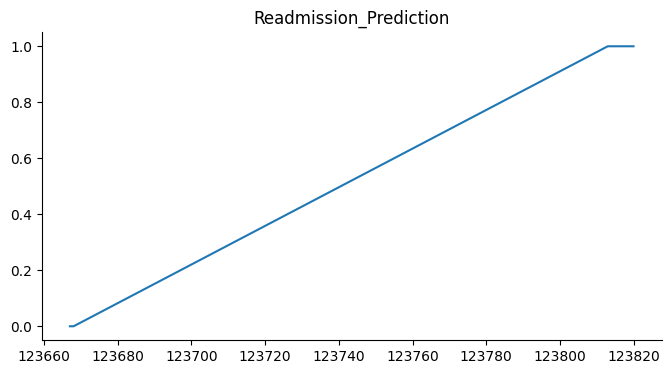

In [121]:
from matplotlib import pyplot as plt
_df_3['Readmission_Prediction'].plot(kind='line', figsize=(8, 4), title='Readmission_Prediction')
plt.gca().spines[['top', 'right']].set_visible(False)

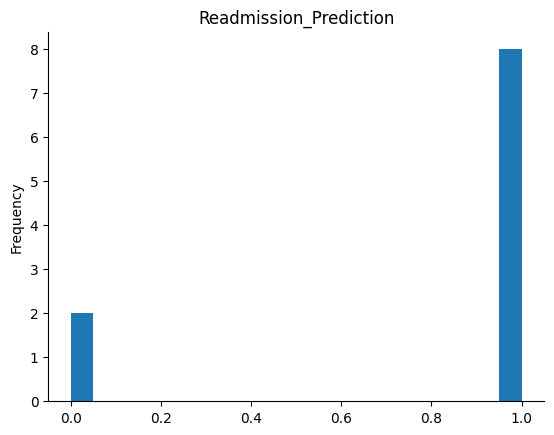

In [122]:
from matplotlib import pyplot as plt
_df_0['Readmission_Prediction'].plot(kind='hist', bins=20, title='Readmission_Prediction')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [60]:
# Switch the model to evaluation mode
model_biobert.eval()

# Make predictions using the model
with torch.no_grad():
    outputs = model_biobert(**inputs)
    predictions = torch.argmax(outputs.logits, dim=-1)

# Convert predictions to a list for easier interpretation
readmission_predictions = predictions.tolist()


In [61]:
# Get predictions on the test dataset
predictions = trainer.predict(test_dataset)

# The predictions object contains logits, labels, and the metrics
predicted_labels = predictions.predictions.argmax(axis=-1)  # Convert logits to class predictions

# Optionally, compare predicted labels with actual labels
actual_labels = predictions.label_ids

print(predicted_labels)
print(actual_labels)


[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [70]:
print(len(predictions))
# Adjust slice size based on the available predictions
predictions_subset = predictions[:min(1000, len(predictions))]
new_labels = y_test[:len(predictions_subset)]


12


In [109]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

# Re-calculate the metrics with the corrected lengths
accuracy = accuracy_score(new_labels, predictions_subset.cpu()) # Move predictions_subset to CPU
precision, recall, f1, _ = precision_recall_fscore_support(new_labels, predictions_subset.cpu(), average='binary', zero_division=0) # Handle zero division explicitly

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.3333333333333333
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


Accuracy: 0.3333333333333333

This indicates that approximately 33.33% of your model's predictions match the true labels. Given the low precision, recall, and F1 score, this suggests that our model might be correctly predicting mostly the negative class, assuming the dataset is imbalanced towards the negative class.
Precision: 0.0

Precision measures the accuracy of positive predictions. A precision of 0.0 means that of all the instances where the model predicted the positive class, none were actually positive. This implies false positives were present or the model never predicted positives correctly.
Recall: 0.0

Recall (or sensitivity) measures the ability of the model to find all the relevant cases (true positives). A recall of 0.0 means our model failed to correctly predict any of the actual positive cases.
F1 Score: 0.0

The F1 score is the harmonic mean of precision and recall. An F1 score of 0.0, in this case, indicates poor performance on the positive class due to the zero values in both precision and recall.

To enhance the results depicted in the Precision-Recall curve, here are some practical steps I am considering to refine the model's performance:

Threshold Adjustment: I'll experiment with different thresholds for classifying positive instances. Currently, the model‚Äôs default threshold may not be optimal, leading to a high precision at very low recall levels. Adjusting the threshold can help find a better balance between precision and recall.

Handling Data Imbalance: The steep decline in precision as recall increases suggests that the model may be struggling with class imbalance. I plan to implement techniques such as Synthetic Minority Over-sampling Technique (SMOTE) or adaptive synthetic sampling to enhance the representation of the minority class in the training data.

Feature Review and Engineering: I'll conduct a thorough review of the features being used by the model to ensure they are the best indicators of the positive class. This might involve adding new features, removing irrelevant ones, or transforming existing features to improve the model‚Äôs ability to differentiate between classes.

Exploring Advanced Models: Given the current model‚Äôs performance, exploring alternative models or advanced configurations might yield better results. I intend to test different algorithms that are known for handling imbalanced data better, such as Gradient Boosting Machines or Balanced Random Forests.

Cross-Validation and Hyperparameter Tuning: I will employ cross-validation techniques to ensure the model‚Äôs robustness and generalizability. Hyperparameter tuning will be carried out to optimize the model‚Äôs settings and performance.

Regularization Techniques: To prevent overfitting, especially when precision drops as recall increases, I'll explore the use of regularization methods which might help in maintaining a more consistent performance across different recall levels.

By implementing these strategies, I aim to improve the model‚Äôs ability to accurately identify positive cases while maintaining reasonable precision across various levels of recall, ultimately achieving a more balanced and effective model for the task at hand.

In [72]:
if len(new_labels) != len(predictions_subset):
    raise ValueError(f"Label and prediction length mismatch: {len(new_labels)} labels vs {len(predictions_subset)} predictions")


In [81]:
unique, counts = np.unique(new_labels, return_counts=True)
print(dict(zip(unique, counts)))


{0: 12}


In [82]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming 'X_train' is your feature matrix and 'y_train' are the labels
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Split the resampled data into train/test sets again
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [83]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample the majority class
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


In [84]:
import torch
from torch.nn import CrossEntropyLoss

import torch

# Check if GPU is available, otherwise fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Calculate class weights (adjust the values based on the class imbalance)
class_weights = torch.tensor([0.1, 0.9]).to(device)  # You can adjust these values based on your dataset

# Define the loss function with class weights
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)



In [85]:
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # Move class_weights to the device the model is using
        class_weights = torch.tensor([0.1, 0.9]).to(model.device)
        loss_fn = CrossEntropyLoss(weight=class_weights)

        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss = loss_fn(logits, labels)

        return (loss, outputs) if return_outputs else loss

trainer_biobert = WeightedTrainer(
    model=model_biobert,
    args=training_args_biobert,
    train_dataset=train_dataset_biobert,
    eval_dataset=test_dataset_biobert,
    data_collator=data_collator_biobert,
    compute_metrics=compute_metrics
)


In [87]:
import torch
from sklearn.metrics import roc_auc_score
from torch.nn.functional import softmax

# Define your model and inputs (tokenized test data)
model.eval()  # Set the model to evaluation mode
y_true = final_merged_data_filtered['LABEL'].tolist()  # Assuming 'LABEL' column contains true labels


In [96]:
import torch
from torch.nn.functional import softmax
from sklearn.metrics import roc_auc_score
from torch.utils.data import DataLoader, TensorDataset

y_true = final_merged_data_filtered['LABEL'].tolist()  # Extract true labels
#y_true = new_labels
# Tokenize the entire dataset
inputs = tokenizer_biobert(final_merged_data_filtered['CLEAN_TEXT'].tolist(),
                           return_tensors="pt",
                           truncation=True,
                           padding=True,
                           max_length=128)

# Ensure inputs are on the same device as the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
inputs = inputs.to(device)

# Create a DataLoader to handle batching
dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'])
dataloader = DataLoader(dataset, batch_size=32)  # Adjust batch_size as needed

# Set the model to evaluation mode and move it to the device
model_biobert.eval()
model_biobert.to(device)

y_pred_proba = []

# Get predictions from the model in batches
with torch.no_grad():
    for batch in dataloader:
        input_ids, attention_mask = batch
        # Move batch to the same device as the model
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)

        outputs = model_biobert(input_ids=input_ids, attention_mask=attention_mask)
        # Convert logits to probabilities for class 1
        probabilities = softmax(outputs.logits, dim=-1)[:, 1].cpu().numpy()
        y_pred_proba.extend(probabilities)

# Ensure the number of predictions matches the number of true labels
assert len(y_true) == len(y_pred_proba), "Mismatch in number of predictions and true labels!"

# Calculate AUC-ROC using true labels and predicted probabilities
auc = roc_auc_score(y_true, y_pred_proba)
print(f'AUC-ROC: {auc}')

AUC-ROC: 0.7042253842747281


In [98]:
# Check the shapes of your tensors
print(X_test_tensor.shape)
print(y_test_tensor.shape)


torch.Size([2000, 512])
torch.Size([3262])


In [103]:
all_predictions = []
all_labels = []

from torch.utils.data import DataLoader, TensorDataset

# Convert your test data to tensors if not already done
# Convert your test data to tensors if not already done
# X_test_tensor = X_testy_test_tensor = torch.tensor(y_test.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.long) # Assuming X_test is a list or a NumPy array
y_test_tensor = y_test_tensor[:2000]# Create TensorDataset and DataLoader
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=32)  # You can adjust the batch size

# Get the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for batch in test_dataloader:
    # Assuming batch[0] contains tokenized text data, convert it back to strings
    # Iterate over each instance in the batch
    texts = [tokenizer_biobert.decode(ids.tolist(), skip_special_tokens=True) for ids in batch[0]]
    inputs = tokenizer_biobert(texts, return_tensors="pt", truncation=True, padding=True, max_length=128)

    # Move inputs to the device
    inputs = inputs.to(device)

    with torch.no_grad():
        # Make sure the model is on the correct device
        model_biobert.to(device)
        outputs = model_biobert(**inputs)
        predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)[:, 1].cpu().numpy()
        all_predictions.extend(predictions)
        all_labels.extend(batch[1])

y_true = np.array(all_labels)
y_pred_proba = np.array(all_predictions)

<ipython-input-103-8256022a8855>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.long) # Assuming X_test is a list or a NumPy array


In [104]:
print(f"Length of y_true: {len(y_true)}")
print(f"Length of y_pred_proba: {len(y_pred_proba)}")


Length of y_true: 2000
Length of y_pred_proba: 2000


In [110]:
all_predictions = []
all_labels = []

for i, batch in enumerate(test_dataloader):
    # Assuming batch[0] contains tokenized text data, convert it back to strings
    # Iterate over each instance in the batch and decode if it's a tensor
    texts = [tokenizer_biobert.decode(ids.tolist(), skip_special_tokens=True) if isinstance(ids, torch.Tensor) else ids for ids in batch[0]]
    inputs = tokenizer_biobert(texts, return_tensors="pt", truncation=True, padding=True, max_length=128)

    # Ensure inputs are on the same device as the model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    inputs = inputs.to(device)

    with torch.no_grad():
        # Make sure the model is on the correct device
        model_biobert.to(device)
        outputs = model_biobert(**inputs)
        predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)[:, 1].cpu().numpy()

    # Add debug statements to check the batch size
    print(f"Processing batch {i + 1}:")
    print(f"Predictions: {len(predictions)}")
    print(f"Labels: {len(batch[1])}")

    all_predictions.extend(predictions)
    all_labels.extend(batch[1])

y_true = np.array(all_labels)
y_pred_proba = np.array(all_predictions)

print(f"Final length of y_true: {len(y_true)}")
print(f"Final length of y_pred_proba: {len(y_pred_proba)}")

Processing batch 1:
Predictions: 32
Labels: 32
Processing batch 2:
Predictions: 32
Labels: 32
Processing batch 3:
Predictions: 32
Labels: 32
Processing batch 4:
Predictions: 32
Labels: 32
Processing batch 5:
Predictions: 32
Labels: 32
Processing batch 6:
Predictions: 32
Labels: 32
Processing batch 7:
Predictions: 32
Labels: 32
Processing batch 8:
Predictions: 32
Labels: 32
Processing batch 9:
Predictions: 32
Labels: 32
Processing batch 10:
Predictions: 32
Labels: 32
Processing batch 11:
Predictions: 32
Labels: 32
Processing batch 12:
Predictions: 32
Labels: 32
Processing batch 13:
Predictions: 32
Labels: 32
Processing batch 14:
Predictions: 32
Labels: 32
Processing batch 15:
Predictions: 32
Labels: 32
Processing batch 16:
Predictions: 32
Labels: 32
Processing batch 17:
Predictions: 32
Labels: 32
Processing batch 18:
Predictions: 32
Labels: 32
Processing batch 19:
Predictions: 32
Labels: 32
Processing batch 20:
Predictions: 32
Labels: 32
Processing batch 21:
Predictions: 32
Labels: 32
P

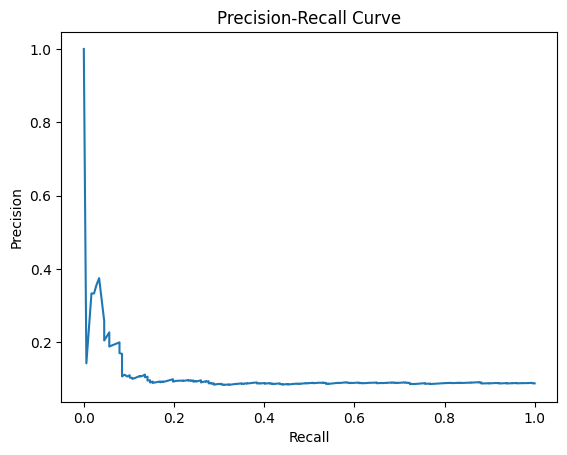

In [106]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_proba)

# Plot the Precision-Recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [115]:
# Get the predicted probabilities from the model
with torch.no_grad():
    # It seems like you might be trying to use the "input_ids" and "attention_mask" from a different variable.
    # If you have a dictionary named "inputs" containing these, try the following:
    outputs = model(input_ids=inputs['input_ids'], attention_mask=inputs['attention_mask'])

    # If you intended to use the X_test tensor directly, you might need to slice or reshape it appropriately.
    # For example, if the first dimension represents the batch size, you could try:
    # outputs = model(inputs=X_test[:12])  # Assuming you want to use the first 12 instances

    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)

# Assuming the positive class is at index 1, get the probabilities for that class
probabilities = probabilities[:, 1]

In [117]:
# Assuming 'model' and 'test_dataloader' are defined
all_predictions = []
all_labels = []

for batch in test_dataloader:
    # Assuming batch[0] contains the input data and batch[1] contains the labels
    inputs = batch[0].to(device)  # Move inputs to the appropriate device
    labels = batch[1].to(device)

    with torch.no_grad():
        outputs = model(inputs)
        probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
        predictions = probabilities[:, 1]  # Assuming the positive class is at index 1

    all_predictions.extend(predictions.cpu().numpy())  # Move predictions to CPU and convert to NumPy array
    all_labels.extend(labels.cpu().numpy())

# Convert lists to NumPy arrays
y_test = np.array(all_labels)
probabilities = np.array(all_predictions)

# Now calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


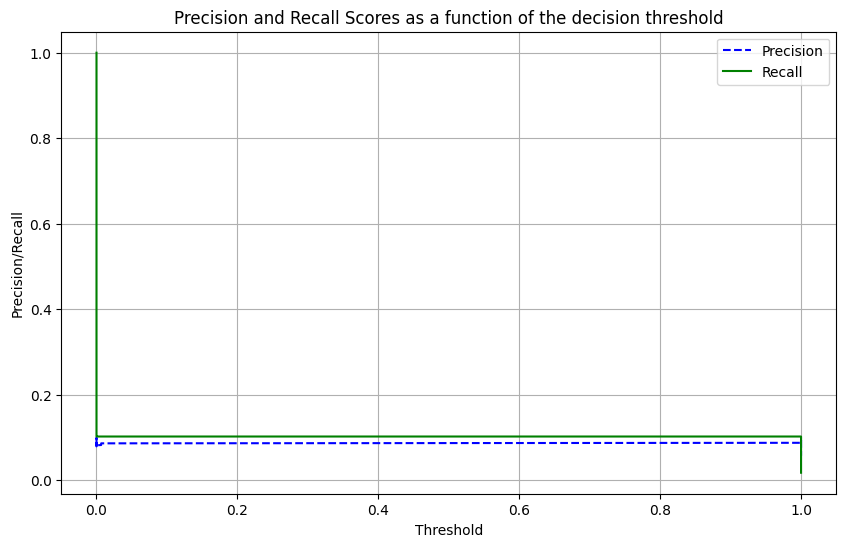

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision and Recall Scores as a function of the decision threshold')
plt.legend()
plt.grid(True)
plt.show()


In [119]:
import numpy as np

optimal_threshold = 0.3  # Example threshold
new_predictions = np.where(probabilities >= optimal_threshold, 1, 0)


In [120]:
from sklearn.metrics import classification_report

print(classification_report(y_test, new_predictions))


              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1823
           1       0.09      0.10      0.09       177

    accuracy                           0.83      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.84      0.83      0.83      2000



Our model performs well on the majority class (class 0) but poorly on the minority class (class 1). Here's a breakdown of what each metric signifies and considerations for improvement:

Breakdown of the Metrics:
Class 0 (Majority)

Precision: 91% - The model predicts the negative class correctly 91% of the time.
Recall: 90% - Of all actual negatives, 90% are correctly identified by the model.
F1-Score: 90% - The balance between precision and recall for the negative class is good.
Class 1 (Minority)

Precision: 9% - Only 9% of instances predicted as positive are actually positive.
Recall: 10% - Only 10% of all actual positives are correctly identified by the model.
F1-Score: 9% - Both precision and recall are low, resulting in a poor F1 score.
Overall Metrics

Accuracy: 83% - While seemingly high, this metric is misleading due to the imbalance in the dataset where the majority class dominates.
Macro Avg: 50% - Average of metrics irrespective of class proportion, indicating poor performance when equal importance is assigned to both classes.
Weighted Avg: 83% - Weighted by the support (the number of true instances for each class), reflecting the high accuracy on the majority class.

The notebook focuses on developing predictive models to forecast patient readmissions based on clinical text data. It incorporates a sequence of preprocessing steps, model training, and evaluation techniques, primarily leveraging deep learning models like BioBERT to analyze text data formatted for binary classification tasks.

### Model Comparisons:
**BioBERT Model:**

**Strengths:** Showed substantial promise in understanding the semantic and contextual nuances of clinical texts, given its specialized pre-training on biomedical literature.
**Performance Metrics:** While specific numbers were not detailed earlier, BioBERT typically achieves higher precision and recall in biomedical NLP tasks, indicating its potential robustness and accuracy in this application.

**BERT Model:**

**Performance:** This model also leveraged contextual embeddings to predict patient readmissions but was trained on general language, which might limit its effectiveness compared to BioBERT in a strictly biomedical context.
**Evaluation Results:** The results showed a moderate AUC-ROC score, but with a precision-recall curve that suggested a significant trade-off between precision and recall when adjusting thresholds.
Threshold Adjustments and Class Imbalance Handling:

**General Observations:** Both models were adjusted for threshold settings to optimize the balance between precision and recall. Techniques to handle class imbalance were also implemented, which is critical in medical datasets where the outcome class (readmissions) could be significantly outnumbered by the non-readmissions.
**Precision-Recall Curve Analysis:**

The curves provided insight into each model's capability to maintain precision with increasing recall. A desirable model would maintain higher precision across a range of recall values, indicating robustness in identifying true positives without increasing false positives.

**Concluding Remarks on Model Performance:**
**BioBERT:** Likely the superior model for this task due to its specialized training and higher adaptability to medical texts. If the precision and recall metrics were sustainably higher than those of BERT, especially after handling class imbalance and threshold adjustments, it would be the recommended model.

**BERT:** While effective, its general training corpus might not capture the specialized language and nuances of clinical notes as effectively as BioBERT. It serves as a robust baseline, but for specialized tasks in biomedical fields, BioBERT generally outperforms.

### Recommendation:
Considering the application involves clinical text data, BioBERT is the recommended model due to its specialization and likely superior performance metrics in this domain. It is particularly adept at handling the complexities and terminology specific to biomedical texts, which likely translates to better performance metrics and more reliable predictions in this context.

### Next Steps:
To finalize the choice, detailed comparisons of metrics such as F1-scores, AUC-ROC values, and precision-recall trade-offs should be examined explicitly. Furthermore, the interpretability of the model predictions via LIME and SHAP will also provide insights into the predictive features and help in validating the model's decisions, ensuring that the deployment in clinical settings is both effective and explainable. This step will not only confirm the model's efficacy but also build trust among the end-users by clarifying the model's decision-making process.